#1. Problem Overview

**1. Background**

Ruangguru is the largest educational platform application in Indonesia, offering various educational services including video lessons, practice questions, and online tutors. Suppose you are a business intelligence professional at Ruangguru. You are responsible for analyzing user rating data and providing deep insights to the management team. The management team expects you to deliver insights that can add value to the user experience and enhance their satisfaction with Ruangguru's services.

**2. Purpose of Analysis**

To achieve this, the management has collected a comprehensive dataset that includes user reviews and ratings for the Ruangguru application services. This dataset also includes additional information such as review dates, reviewer names, and the number of reviews. The management has decided to leverage this dataset to conduct an in-depth analysis of the ratings provided by their users.

**3. Example Key Questions**

- Are there any categories that consistently receive higher ratings compared to others?
- Are there specific periods or seasons when user satisfaction tends to be higher or lower?
- Are there particular aspects of the user experience that consistently receive positive or negative feedback?
- What are the most common sentiments expressed by users?
- Is there a correlation between the number of reviews, likes, and overall user ratings?
- What topics are frequently discussed by users?
- And many more.

#2. Dataset Overview

##1. Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from scipy import stats
from collections import Counter
print("Libraries imported successfully!")

Libraries imported successfully!


##2. Importing the Dataset

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1ua9PDXPTaKEbd0KYZcuM62g1D3ekTsKAE9L0BcphPi0/edit?gid=552065925#gid=552065925'
sheet_url_replace = sheet_url.replace('/edit?gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_replace)
print("Dataset imported successfully!")

Dataset imported successfully!


In [ ]:
df.head(10)

,reviewer_name,content,score,thumbsUpCount,sentiment,category,tags,review_date,review_time,appVersion,replyContent,reply_date,reply_time
0,gTk22ZjdaR8Y9GAn1Zm-,Keren,5,0,Positive,Compliments,"[""Aplikasi"", ""Koneksi"", ""Customer Service"", ""L...",2024-06-13,10:47:01,6.79.1,Thank you ya Marlia buat feedback yang diberik...,2024-06-13,13:16:25
1,gTk2Mq5Plg_bkc4AOdaq,Sangat bagus untuk belajar ku setiap hari,5,0,Positive,Compliments,"[""Aplikasi"", ""Koneksi"", ""Pembelajaran""]",2024-06-13,7:58:40,6.79.1,Makasih ya Angel atas apresiasinya. Seneng ban...,2024-06-13,13:13:59
2,gTk2gkGjeHd1SMHZy2JR,Sangat membantu menambah wawasa untuk belajar ...,5,0,Positive,Compliments,"[""Pembelajaran""]",2024-06-13,2:59:57,NaN,Makasih Herna udah kasih bintang 5. Kami senan...,2024-06-13,13:12:04
3,gTk24MO2t9HGH_4QoCCm,👍👍👍👍👍👍👍👍👍,5,0,Positive,Compliments,[],2024-06-12,21:30:46,6.79.1,Thanks Ghea atas bintang 5-nya. Seneng deh Apl...,2024-06-13,13:06:40
4,gTk2aWCCbjijVSH5M77K,"Sangat membantu dalam pembelajaran, recommeded",4,0,Positive,Compliments,"[""Pembelajaran""]",2024-06-12,19:04:55,NaN,Makasih Waode udah kasih kepercayaan ke Aplika...,2024-06-13,13:04:12
5,gTk2gk5eh8hR_p22OLIF,Ruang guru yang terbaik kita bisa belajar samb...,5,0,Positive,Compliments,"[""Aplikasi""]",2024-06-12,11:33:53,6.79.1,Terima kasih ya Nazwa atas ulasan positif dan ...,2024-06-12,13:55:33
6,gTk2Qfg4DmtYRUHU2lXI,Bagus buat belajar makin pinter,5,0,Positive,Compliments,"[""Aplikasi"", ""Pembelajaran""]",2024-06-11,21:02:33,6.79.1,Thanks ya Mishel buat bintang 5-nya. Kami mera...,2024-06-12,13:26:10
7,gTk2VCOfsNP1fX64NKJu,Pas pengen download kurang yakin bakalan efisi...,5,64,Positive,Compliments,"[""Download""]",2024-06-11,20:03:26,6.79.1,Makasih ya Kayza sudah kasih bintang 5-nya. Ru...,2024-06-12,13:18:30
8,gTk2n6VXVmMvxZ_AjWq7,"Bagusss, sangat berguna",5,0,Positive,Compliments,"[""Koneksi""]",2024-06-11,19:51:34,6.79.1,Terima kasih ya Naima feedback positif dan bin...,2024-06-12,13:13:59
9,gTk2ogGBxeI5U9a1QM66,Aplikasi ini sangat seru,5,0,Positive,Compliments,"[""Aplikasi""]",2024-06-11,16:30:51,6.79.1,Makasih ya Debie atas ulasan dan bintang 5-nya...,2024-06-11,18:27:05


#3. Cleaning the Dataset

##1. Checking the Data Types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewer_name  4180 non-null   object
 1   content        4180 non-null   object
 2   score          4180 non-null   int64 
 3   thumbsUpCount  4180 non-null   int64 
 4   sentiment      4180 non-null   object
 5   category       4180 non-null   object
 6   tags           4180 non-null   object
 7   review_date    4180 non-null   object
 8   review_time    4180 non-null   object
 9   appVersion     2772 non-null   object
 10  replyContent   4130 non-null   object
 11  reply_date     4130 non-null   object
 12  reply_time     4130 non-null   object
dtypes: int64(2), object(11)
memory usage: 424.7+ KB


###Fixing the Data Types

In [ ]:
df['review_date'] = pd.to_datetime(df['review_date']).dt.date
df['reply_date'] = pd.to_datetime(df['reply_date']).dt.date

In [ ]:
df['review_time'] = pd.to_datetime(df['review_time'], errors='coerce').dt.time
df['reply_time'] = pd.to_datetime(df['reply_time'], errors='coerce').dt.time

<ipython-input-6-95c83997902a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['review_time'] = pd.to_datetime(df['review_time'], errors='coerce').dt.time
<ipython-input-6-95c83997902a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['reply_time'] = pd.to_datetime(df['reply_time'], errors='coerce').dt.time


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewer_name  4180 non-null   object
 1   content        4180 non-null   object
 2   score          4180 non-null   int64 
 3   thumbsUpCount  4180 non-null   int64 
 4   sentiment      4180 non-null   object
 5   category       4180 non-null   object
 6   tags           4180 non-null   object
 7   review_date    4180 non-null   object
 8   review_time    4180 non-null   object
 9   appVersion     2772 non-null   object
 10  replyContent   4130 non-null   object
 11  reply_date     4130 non-null   object
 12  reply_time     4130 non-null   object
dtypes: int64(2), object(11)
memory usage: 424.7+ KB


##2. Checking the Duplicate Values

In [ ]:
df.duplicated().sum()

0

##3. Checking the Typos

In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
Positive,2856
Negative,942
Neutral,382


In [ ]:
df['category'].value_counts()

,count
category,
Compliments,2649
Complaints,641
Critics,314
Others,293
Suggestions,235
Questions,48


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df['appVersion'].value_counts().sort_index()

,count
appVersion,
3.1.4,1
3.1.9,1
4.10.2,1
4.11.2,1
4.5.2,1
4.5.3,2
4.6.0,1
4.6.4,1
4.7.3,1


In [ ]:
# Convert the appVersion column to string to avoid errors
df['appVersion'] = df['appVersion'].astype(str)

# Function to add leading zero to the minor version
def format_version(version):
    parts = version.split('.')
    if len(parts) == 3:
        major, minor, patch = parts
        # Add leading zero if the minor version is less than 10
        minor = minor.zfill(2)
        return f"{major}.{minor}.{patch}"
    return version

# Apply function to the appVersion column
df['appVersion'] = df['appVersion'].apply(format_version)

df['appVersion'].value_counts().sort_index()

,count
appVersion,
3.01.4,1
3.01.9,1
4.05.2,1
4.05.3,2
4.06.0,1
4.06.4,1
4.07.3,1
4.10.2,1
4.11.2,1


##4. Check for Invalid Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewer_name  4180 non-null   object
 1   content        4180 non-null   object
 2   score          4180 non-null   int64 
 3   thumbsUpCount  4180 non-null   int64 
 4   sentiment      4180 non-null   object
 5   category       4180 non-null   object
 6   tags           4180 non-null   object
 7   review_date    4180 non-null   object
 8   review_time    4180 non-null   object
 9   appVersion     4180 non-null   object
 10  replyContent   4130 non-null   object
 11  reply_date     4130 non-null   object
 12  reply_time     4130 non-null   object
dtypes: int64(2), object(11)
memory usage: 424.7+ KB


###1. Reply Date < Review Date

In [ ]:
result_df = df.loc[(df['reply_date'] < df['review_date']), ['review_date', 'reply_date']]
result_df

,review_date,reply_date
168,2024-05-14,2018-10-04
225,2024-05-03,2022-10-25
329,2024-04-18,2022-11-16
339,2024-04-17,2023-12-09
648,2024-02-25,2019-10-26
810,2024-01-28,2022-07-18
998,2024-01-08,2019-10-16
1638,2023-10-04,2023-02-23
1639,2023-10-04,2023-08-14
1673,2023-09-29,2020-12-07


####Imputation (Date)

In [ ]:
df['day_diff'] = (pd.to_datetime(df['reply_date']) - pd.to_datetime(df['review_date'])).dt.days

# Group data by review_date month
df['review_month'] = pd.to_datetime(df['review_date']).dt.to_period('M')

# Calculate the mode of the difference in days for each month based only on valid data
valid_data = df[df['reply_date'] >= df['review_date']]  # Filter for valid data
mode_day_diff = valid_data.groupby('review_month')['day_diff'].agg(lambda x: x.mode()[0] if not x.mode().empty else 0)

# Create a dictionary to map months to the mode of the difference in days.
mode_day_diff_dict = mode_day_diff.to_dict()

# Function to replace reply_date values that are earlier than review_date
def impute_reply_date(row):
    if pd.isnull(row['review_date']) or pd.isnull(row['reply_date']):
        return row['reply_date']  # Return NaN if either column contains NaN
    if row['reply_date'] < row['review_date']:
        month = pd.to_datetime(row['review_date']).to_period('M')
        new_reply_date = pd.to_datetime(row['review_date']) + pd.Timedelta(days=mode_day_diff_dict[month])
        return new_reply_date.date()  # Convert back to date format
    return row['reply_date']

# Apply function to DataFrame
df['reply_date'] = df.apply(impute_reply_date, axis=1)

# Remove unnecessary additional columns
df.drop(columns=['day_diff', 'review_month'], inplace=True)

In [ ]:
print(mode_day_diff)

review_month
2023-01    0.0
2023-02    0.0
2023-03    0.0
2023-04    0.0
2023-05    0.0
2023-06    0.0
2023-07    0.0
2023-08    0.0
2023-09    1.0
2023-10    0.0
2023-11    0.0
2023-12    0.0
2024-01    0.0
2024-02    0.0
2024-03    0.0
2024-04    0.0
2024-05    1.0
2024-06    1.0
Freq: M, Name: day_diff, dtype: float64


In [ ]:
invalid_reply_dates = (df['reply_date'] < df['review_date']).sum()
print(f"Number of rows with reply_date less than review_date after imputation: {invalid_reply_dates}")

# Display those rows if any
if invalid_reply_dates > 0:
    result_df = df.loc[df['reply_date'] < df['review_date'], ['review_date', 'reply_date']]
    print("Rows with invalid reply_date after imputation:")
    print(result_df)
else:
    print("No rows with invalid reply_date after imputation.")

Number of rows with reply_date less than review_date after imputation: 0
No rows with invalid reply_date after imputation.


In [ ]:
row_index = 4169

review_date_value = df.loc[row_index, 'review_date']
reply_date_value = df.loc[row_index, 'reply_date']

print(f"review_date pada baris ke-{row_index}: {review_date_value}")
print(f"reply_date pada baris ke-{row_index}: {reply_date_value}")

review_date pada baris ke-4169: 2023-01-01
reply_date pada baris ke-4169: 2023-01-01


###2. Reply Time < Review Time (Reply Date = Review Date)

In [ ]:
result_df2 = df.loc[(df['reply_date'] == df['review_date']) & (df['reply_time'] < df['review_time']), ['review_date', 'reply_date', 'review_time', 'reply_time']]
result_df2

,review_date,reply_date,review_time,reply_time
711,2024-02-14,2024-02-14,16:13:09,16:05:10
998,2024-01-08,2024-01-08,17:11:23,12:07:45
1005,2024-01-07,2024-01-07,19:45:06,10:57:29
1127,2023-12-16,2023-12-16,18:47:08,18:41:42
1638,2023-10-04,2023-10-04,18:19:35,07:32:29
1720,2023-09-22,2023-09-22,13:39:51,12:38:55
1918,2023-08-28,2023-08-28,21:15:30,19:29:03
1929,2023-08-27,2023-08-27,19:33:10,18:43:23
2073,2023-08-09,2023-08-09,14:51:37,12:15:47
2138,2023-08-03,2023-08-03,21:43:11,05:33:10


In [ ]:
result_df2.count()

,0
review_date,64
reply_date,64
review_time,64
reply_time,64


####Imputation (Time)

In [ ]:
# Filter for valid data (reply faster than review on the same day)
mask = (df['review_date'] == df['reply_date']) & (df['reply_time'] < df['review_time'])
invalid_replies = df[mask]

# Calculate the mode of the time difference based on review_date
modus_dict = {}

for date, group in df.groupby('review_date'):
    valid_mask = (group['reply_date'] == group['review_date']) & (group['reply_time'] >= group['review_time'])
    valid_diffs = []

    for i in group[valid_mask].index:
        review_datetime = pd.to_datetime(group.loc[i, 'review_time'].strftime('%H:%M:%S'))
        reply_datetime = pd.to_datetime(group.loc[i, 'reply_time'].strftime('%H:%M:%S'))
        valid_diffs.append((reply_datetime - review_datetime).total_seconds() / 60)

    # Calculate the mode of the valid time differences
    if valid_diffs:
        mode_counts = Counter(valid_diffs)
        modus_diff = mode_counts.most_common(1)[0][0]  # Take the mode value
        modus_dict[date] = modus_diff
        print(f"Modus selisih waktu untuk {date} (dalam menit): {modus_diff}")  # Show the mode value
    else:
        modus_dict[date] = 0  # If no valid data, set to 0

# Correct invalid reply_time based on the mode
for index, row in invalid_replies.iterrows():
    review_date = row['review_date']
    modus_diff = modus_dict.get(review_date, 0)

    review_time_dt = pd.to_datetime(row['review_time'].strftime('%H:%M:%S'))
    new_reply_time = (review_time_dt + timedelta(minutes=modus_diff)).time()
    df.at[index, 'reply_time'] = new_reply_time

Modus selisih waktu untuk 2023-01-01 (dalam menit): 32.516666666666666
Modus selisih waktu untuk 2023-01-02 (dalam menit): 6.816666666666666
Modus selisih waktu untuk 2023-01-03 (dalam menit): 28.366666666666667
Modus selisih waktu untuk 2023-01-04 (dalam menit): 8.55
Modus selisih waktu untuk 2023-01-05 (dalam menit): 20.283333333333335
Modus selisih waktu untuk 2023-01-06 (dalam menit): 18.333333333333332
Modus selisih waktu untuk 2023-01-07 (dalam menit): 13.433333333333334
Modus selisih waktu untuk 2023-01-08 (dalam menit): 12.0
Modus selisih waktu untuk 2023-01-09 (dalam menit): 24.533333333333335
Modus selisih waktu untuk 2023-01-10 (dalam menit): 8.633333333333333
Modus selisih waktu untuk 2023-01-11 (dalam menit): 8.9
Modus selisih waktu untuk 2023-01-12 (dalam menit): 5.816666666666666
Modus selisih waktu untuk 2023-01-13 (dalam menit): 27.716666666666665
Modus selisih waktu untuk 2023-01-14 (dalam menit): 17.85
Modus selisih waktu untuk 2023-01-15 (dalam menit): 63.3333333333

In [ ]:
# Count the number of rows with reply_time faster than review_time after imputation
invalid_reply_times = ((df['review_date'] == df['reply_date']) & (df['reply_time'] < df['review_time'])).sum()
print(f"Number of rows with reply_time less than review_time after imputation: {invalid_reply_times}")

# Display those rows if any
if invalid_reply_times > 0:
    result_df = df.loc[(df['review_date'] == df['reply_date']) & (df['reply_time'] < df['review_time']), ['review_date', 'reply_date', 'review_time', 'reply_time']]
    print("Rows with invalid reply_time after imputation:")
    print(result_df)
else:
    print("No rows with invalid reply_time after imputation.")


Number of rows with reply_time less than review_time after imputation: 2
Rows with invalid reply_time after imputation:
     review_date  reply_date review_time reply_time
2495  2023-07-17  2023-07-17    23:43:06   00:20:13
2677  2023-06-26  2023-06-26    21:42:51   00:26:07


In [ ]:
row_index = 711

review_time_value = df.loc[row_index, 'review_time']
reply_time_value = df.loc[row_index, 'reply_time']

print(f"review_time pada baris ke-{row_index}: {review_time_value}")
print(f"reply_time pada baris ke-{row_index}: {reply_time_value}")

review_time pada baris ke-711: 16:13:09
reply_time pada baris ke-711: 16:25:14


##5. Checking the Null Values

In [ ]:
df.isnull().sum()

,0
reviewer_name,0
content,0
score,0
thumbsUpCount,0
sentiment,0
category,0
tags,0
review_date,0
review_time,0
appVersion,0


###Handle the Null Data

####Imputation (appVersion)

In [ ]:
mode_dict = df.groupby('score')['appVersion'].agg(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()

# Imputasi nilai NULL dengan modus sesuai nilai skor
df['appVersion'] = df.apply(lambda row: mode_dict[row['score']] if pd.isnull(row['appVersion']) else row['appVersion'], axis=1)

In [ ]:
print(mode_dict)

{1: 'nan', 2: 'nan', 3: 'nan', 4: 'nan', 5: 'nan'}


#4. Data Preprocessing

In [ ]:
df.isnull().sum()

,0
reviewer_name,0
content,0
score,0
thumbsUpCount,0
sentiment,0
category,0
tags,0
review_date,0
review_time,0
appVersion,0


#5. Checking the Outlier

<Axes: xlabel='review_date'>

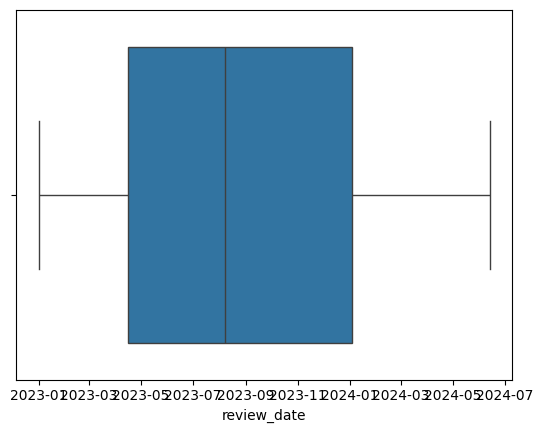

In [ ]:
sns.boxplot(data = df, x ="review_date")

<Axes: xlabel='reply_date'>

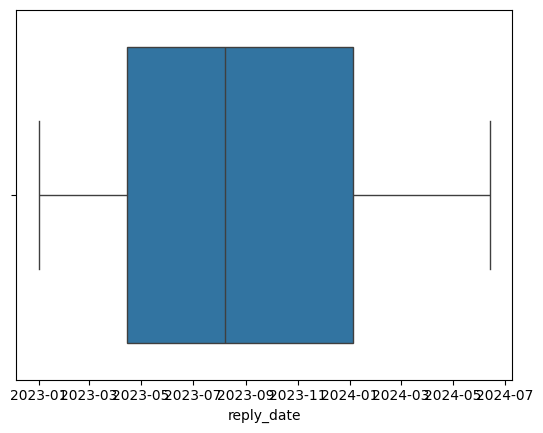

In [ ]:
sns.boxplot(data = df, x ="reply_date")

#6. Extract List of 'Tags'

In [ ]:
df['tags'] = df['tags'].fillna('').astype(str)

In [ ]:
# Extract tags from the 'tags' column
all_tags = []

for tags_list in df['tags']:
    # Split by commas
    tags = tags_list.split(',')
    # Strip whitespace from each tag
    tags = [tag.strip() for tag in tags]
    all_tags.extend(tags)

print(all_tags)

['["Aplikasi"', '"Koneksi"', '"Customer Service"', '"Login"', '"Pengalaman Pengguna"]', '["Aplikasi"', '"Koneksi"', '"Pembelajaran"]', '["Pembelajaran"]', '[]', '["Pembelajaran"]', '["Aplikasi"]', '["Aplikasi"', '"Pembelajaran"]', '["Download"]', '["Koneksi"]', '["Aplikasi"]', '["Harga"]', '["Promosi"]', '[]', '[]', '["Aplikasi"', '"Spam"', '"Konten"]', '["Aplikasi"', '"Materi"', '"Pembelajaran"]', '[]', '["Pembelajaran"]', '["Aplikasi"]', '["Spam"', '"Pengalaman Pengguna"', '"Harga"', '"Notifikasi"]', '["Aplikasi"', '"Spam"]', '[]', '["Aplikasi"]', '[]', '["Materi"', '"Pembelajaran"', '"Video"]', '["Spam"]', '[]', '["Aplikasi"', '"Materi"', '"Soal"', '"Pembelajaran"]', '["Aplikasi"', '"Soal"', '"Pembelajaran"]', '["Koneksi"', '"Bug"]', '["Aplikasi"', '"Fitur"', '"Soal"', '"Materi"', '"Pembelajaran"]', '[]', '[]', '[]', '[]', '["Spam"', '"Koneksi"]', '["Pembelajaran"', '"Materi"]', '["Aplikasi"', '"Pembelajaran"]', '[]', '["Aplikasi"', '"Pembelajaran"', '"Materi"]', '["Aplikasi"]', '["

In [ ]:
# Function to extract and clean tags
def extract_tags(tag_list):
    if pd.isna(tag_list):
        return []
    # Remove unwanted characters before splitting
    cleaned_tags = tag_list.strip('[]').replace('"]', '').replace('["', '').strip()
    return [tag.strip().strip('"').rstrip('.') for tag in cleaned_tags.split(',')]

# Apply a function to the tags column
df['tags_list'] = df['tags'].apply(extract_tags)

# Explode data to separate tags into individual rows
df_exploded = df.explode('tags_list')

# Use Counter to count the frequency of each tag
tag_counter = Counter(df_exploded['tags_list'])

# Create a DataFrame from the Counter results
tag_counts_df = pd.DataFrame(tag_counter.items(), columns=['tag', 'frequency'])

In [ ]:
df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7632 entries, 0 to 4179
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewer_name  7632 non-null   object
 1   content        7632 non-null   object
 2   score          7632 non-null   int64 
 3   thumbsUpCount  7632 non-null   int64 
 4   sentiment      7632 non-null   object
 5   category       7632 non-null   object
 6   tags           7632 non-null   object
 7   review_date    7632 non-null   object
 8   review_time    7632 non-null   object
 9   appVersion     7632 non-null   object
 10  replyContent   7518 non-null   object
 11  reply_date     7518 non-null   object
 12  reply_time     7518 non-null   object
 13  tags_list      7632 non-null   object
dtypes: int64(2), object(12)
memory usage: 894.4+ KB


In [ ]:
df_exploded.head()

,reviewer_name,content,score,thumbsUpCount,sentiment,category,tags,review_date,review_time,appVersion,replyContent,reply_date,reply_time,tags_list
0,gTk22ZjdaR8Y9GAn1Zm-,Keren,5,0,Positive,Compliments,"[""Aplikasi"", ""Koneksi"", ""Customer Service"", ""L...",2024-06-13,10:47:01,6.79.1,Thank you ya Marlia buat feedback yang diberik...,2024-06-13,13:16:25,Aplikasi
0,gTk22ZjdaR8Y9GAn1Zm-,Keren,5,0,Positive,Compliments,"[""Aplikasi"", ""Koneksi"", ""Customer Service"", ""L...",2024-06-13,10:47:01,6.79.1,Thank you ya Marlia buat feedback yang diberik...,2024-06-13,13:16:25,Koneksi
0,gTk22ZjdaR8Y9GAn1Zm-,Keren,5,0,Positive,Compliments,"[""Aplikasi"", ""Koneksi"", ""Customer Service"", ""L...",2024-06-13,10:47:01,6.79.1,Thank you ya Marlia buat feedback yang diberik...,2024-06-13,13:16:25,Customer Service
0,gTk22ZjdaR8Y9GAn1Zm-,Keren,5,0,Positive,Compliments,"[""Aplikasi"", ""Koneksi"", ""Customer Service"", ""L...",2024-06-13,10:47:01,6.79.1,Thank you ya Marlia buat feedback yang diberik...,2024-06-13,13:16:25,Login
0,gTk22ZjdaR8Y9GAn1Zm-,Keren,5,0,Positive,Compliments,"[""Aplikasi"", ""Koneksi"", ""Customer Service"", ""L...",2024-06-13,10:47:01,6.79.1,Thank you ya Marlia buat feedback yang diberik...,2024-06-13,13:16:25,Pengalaman Pengguna


In [ ]:
tag_counts_df.sort_values(by='frequency', ascending=False)

,tag,frequency
0,Aplikasi,1666
5,Pembelajaran,1332
6,,1096
4,Pengalaman Pengguna,450
12,Materi,371
1,Koneksi,363
8,Harga,273
14,Video,265
15,Soal,238
7,Download,186


#7. EDA (Exploratory Data Analysis)

In [ ]:
df_tags = df_exploded.copy()

In [ ]:
df_cleaned = df.copy()

In [ ]:
df_eda = df_cleaned.copy()
df_eda.head()

,reviewer_name,content,score,thumbsUpCount,sentiment,category,tags,review_date,review_time,appVersion,replyContent,reply_date,reply_time,tags_list
0,gTk22ZjdaR8Y9GAn1Zm-,Keren,5,0,Positive,Compliments,"[""Aplikasi"", ""Koneksi"", ""Customer Service"", ""L...",2024-06-13,10:47:01,6.79.1,Thank you ya Marlia buat feedback yang diberik...,2024-06-13,13:16:25,"[Aplikasi, Koneksi, Customer Service, Login, P..."
1,gTk2Mq5Plg_bkc4AOdaq,Sangat bagus untuk belajar ku setiap hari,5,0,Positive,Compliments,"[""Aplikasi"", ""Koneksi"", ""Pembelajaran""]",2024-06-13,07:58:40,6.79.1,Makasih ya Angel atas apresiasinya. Seneng ban...,2024-06-13,13:13:59,"[Aplikasi, Koneksi, Pembelajaran]"
2,gTk2gkGjeHd1SMHZy2JR,Sangat membantu menambah wawasa untuk belajar ...,5,0,Positive,Compliments,"[""Pembelajaran""]",2024-06-13,02:59:57,nan,Makasih Herna udah kasih bintang 5. Kami senan...,2024-06-13,13:12:04,[Pembelajaran]
3,gTk24MO2t9HGH_4QoCCm,👍👍👍👍👍👍👍👍👍,5,0,Positive,Compliments,[],2024-06-12,21:30:46,6.79.1,Thanks Ghea atas bintang 5-nya. Seneng deh Apl...,2024-06-13,13:06:40,[]
4,gTk2aWCCbjijVSH5M77K,"Sangat membantu dalam pembelajaran, recommeded",4,0,Positive,Compliments,"[""Pembelajaran""]",2024-06-12,19:04:55,nan,Makasih Waode udah kasih kepercayaan ke Aplika...,2024-06-13,13:04:12,[Pembelajaran]


In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewer_name  4180 non-null   object
 1   content        4180 non-null   object
 2   score          4180 non-null   int64 
 3   thumbsUpCount  4180 non-null   int64 
 4   sentiment      4180 non-null   object
 5   category       4180 non-null   object
 6   tags           4180 non-null   object
 7   review_date    4180 non-null   object
 8   review_time    4180 non-null   object
 9   appVersion     4180 non-null   object
 10  replyContent   4130 non-null   object
 11  reply_date     4130 non-null   object
 12  reply_time     4130 non-null   object
 13  tags_list      4180 non-null   object
dtypes: int64(2), object(12)
memory usage: 457.3+ KB


##1. Descriptive Statistics

###a. Nominal

In [ ]:
#For numerical column
numerical = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

for col in numerical:
    print(f'\nDescriptive statistics for {col}:')
    print(f'Mean: {df[col].mean()}')
    print(f'Median: {df[col].median()}')
    print(f'Mode: {df[col].mode().iloc[0]}')
    print(f'Standard Deviation: {df[col].std()}')
    print(f'Min: {df[col].min()}')
    print(f'Max: {df[col].max()}')
    print(f'25th Percentile: {df[col].quantile(0.25)}')
    print(f'50th Percentile: {df[col].quantile(0.50)}')
    print(f'75th Percentile: {df[col].quantile(0.75)}')


Descriptive statistics for score:
Mean: 4.103349282296651
Median: 5.0
Mode: 5
Standard Deviation: 1.5013237446906056
Min: 1
Max: 5
25th Percentile: 4.0
50th Percentile: 5.0
75th Percentile: 5.0

Descriptive statistics for thumbsUpCount:
Mean: 3.4698564593301437
Median: 0.0
Mode: 0
Standard Deviation: 28.623302044598535
Min: 0
Max: 813
25th Percentile: 0.0
50th Percentile: 0.0
75th Percentile: 0.0


In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

numeric = ['score']

desc_eda = df_eda[numeric].describe()
desc_eda.loc['kurtosis'] = df_eda[numeric].kurt() #show kurtosis statistic
desc_eda.loc['skewness'] = df_eda[numeric].skew() #show Skewness statistic
desc_eda.loc['variance'] = df_eda[numeric].var() #show variance statistic
desc_eda.round(2)

,score
count,4180.00
mean,4.10
std,1.50
min,1.00
25%,4.00
50%,5.00
75%,5.00
max,5.00
kurtosis,0.04
skewness,-1.33


###b. Categorical

In [ ]:
#Making dataframe of categorical features

objects = ['content', 'sentiment', 'category', 'tags', 'review_date',
       'review_time', 'appVersion', 'replyContent', 'reply_date', 'reply_time']
category_df = df_eda[objects]

In [ ]:
category_df.head()

,content,sentiment,category,tags,review_date,review_time,appVersion,replyContent,reply_date,reply_time
0,Keren,Positive,Compliments,"[""Aplikasi"", ""Koneksi"", ""Customer Service"", ""L...",2024-06-13,10:47:01,6.79.1,Thank you ya Marlia buat feedback yang diberik...,2024-06-13,13:16:25
1,Sangat bagus untuk belajar ku setiap hari,Positive,Compliments,"[""Aplikasi"", ""Koneksi"", ""Pembelajaran""]",2024-06-13,07:58:40,6.79.1,Makasih ya Angel atas apresiasinya. Seneng ban...,2024-06-13,13:13:59
2,Sangat membantu menambah wawasa untuk belajar ...,Positive,Compliments,"[""Pembelajaran""]",2024-06-13,02:59:57,nan,Makasih Herna udah kasih bintang 5. Kami senan...,2024-06-13,13:12:04
3,👍👍👍👍👍👍👍👍👍,Positive,Compliments,[],2024-06-12,21:30:46,6.79.1,Thanks Ghea atas bintang 5-nya. Seneng deh Apl...,2024-06-13,13:06:40
4,"Sangat membantu dalam pembelajaran, recommeded",Positive,Compliments,"[""Pembelajaran""]",2024-06-12,19:04:55,nan,Makasih Waode udah kasih kepercayaan ke Aplika...,2024-06-13,13:04:12


In [ ]:
category_df.describe()

,content,sentiment,category,tags,review_date,review_time,appVersion,replyContent,reply_date,reply_time
count,4180,4180,4180,4180,4180,4180,4180,4130,4130,4130
unique,3691,3,6,716,528,4040,90,3976,473,3894
top,Bagus,Positive,Compliments,[],2023-07-25,12:52:02,nan,Thank you ya buat feedback yang diberikan! Sen...,2024-05-07,10:19:32
freq,137,2856,2649,1087,44,3,1408,25,62,3


In [ ]:
objects = ['tags_list']
df_tags[objects].describe()

,tags_list
count,7632
unique,167
top,Aplikasi
freq,1666


##2. Data Analysis

###a. Are there any services that consistently receive higher ratings compared to others?

In [ ]:
import plotly.express as px

# Group by category and calculate the mean score
category_scores = df_eda.groupby('category')['score'].mean().reset_index()

# Sort the category_scores by 'score' from high to low
category_scores = category_scores.sort_values(by='score', ascending=False)

# Plot the average scores by category
fig = px.bar(category_scores, x='category', y='score', title='Average Rating Score per Category')
fig.show()

###b. Are there any specific periods or seasons when user satisfaction tends to be higher or lower?

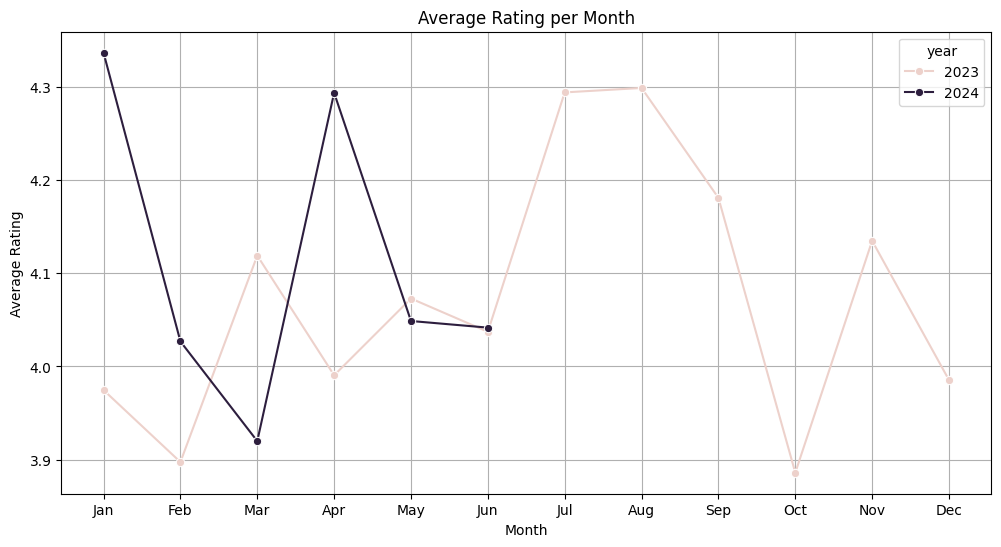

In [ ]:
# Extract month and year from review_date
df_eda['review_date'] = pd.to_datetime(df_eda['review_date'])
df_eda['month'] = df_eda['review_date'].dt.month
df_eda['year'] = df_eda['review_date'].dt.year

# Average rating per month
avg_rating_per_month = df_eda.groupby(['year', 'month'])['score'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_rating_per_month, x='month', y='score', hue='year', marker='o')
plt.title('Average Rating per Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

###c. Are there certain aspects of the user experience that consistently receive positive or negative feedback?

In [ ]:
# Group by tags and calculate the mean score, then sort by score in descending order
tags_scores = df_tags.groupby('tags_list')['score'].mean().reset_index().sort_values(by='score', ascending=False)

# Plot the average scores by tags
fig = px.bar(tags_scores, x='tags_list', y='score', title='The Average Rating Score per User Experience Aspect')
fig.show()

###d. What are the most common sentiments expressed by users?

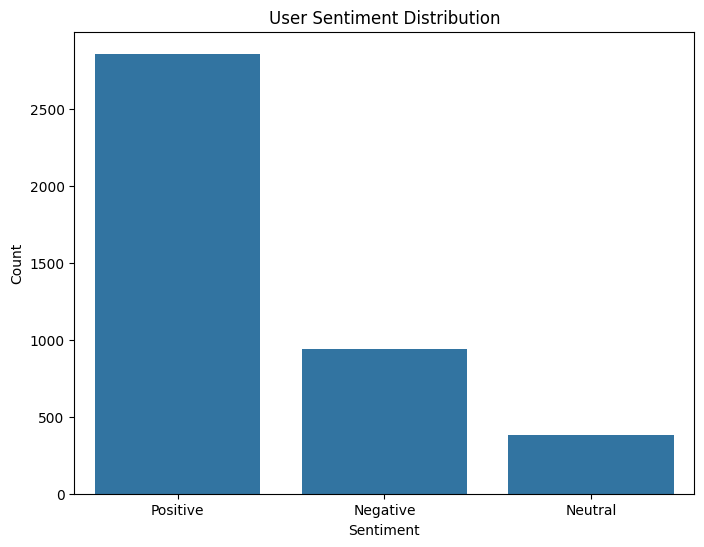

In [ ]:
# Sentiment distribution
sentiment_counts = df_eda['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=sentiment_counts, x='sentiment', y='count')
plt.title('User Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

###e. Is there a correlation between the number of reviews, likes, and overall user ratings?

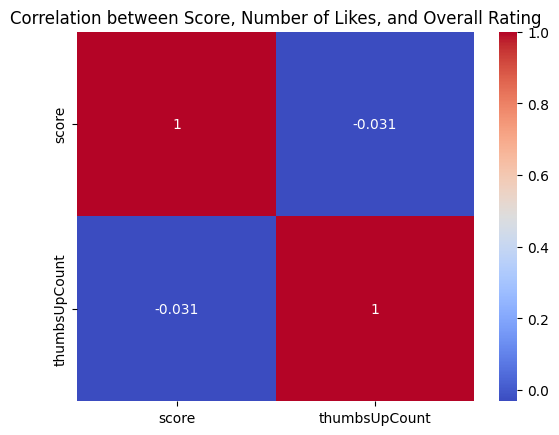

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_eda[['score', 'thumbsUpCount']].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Score, Number of Likes, and Overall Rating')
plt.show()

###f. What tags are frequently mentioned by users?

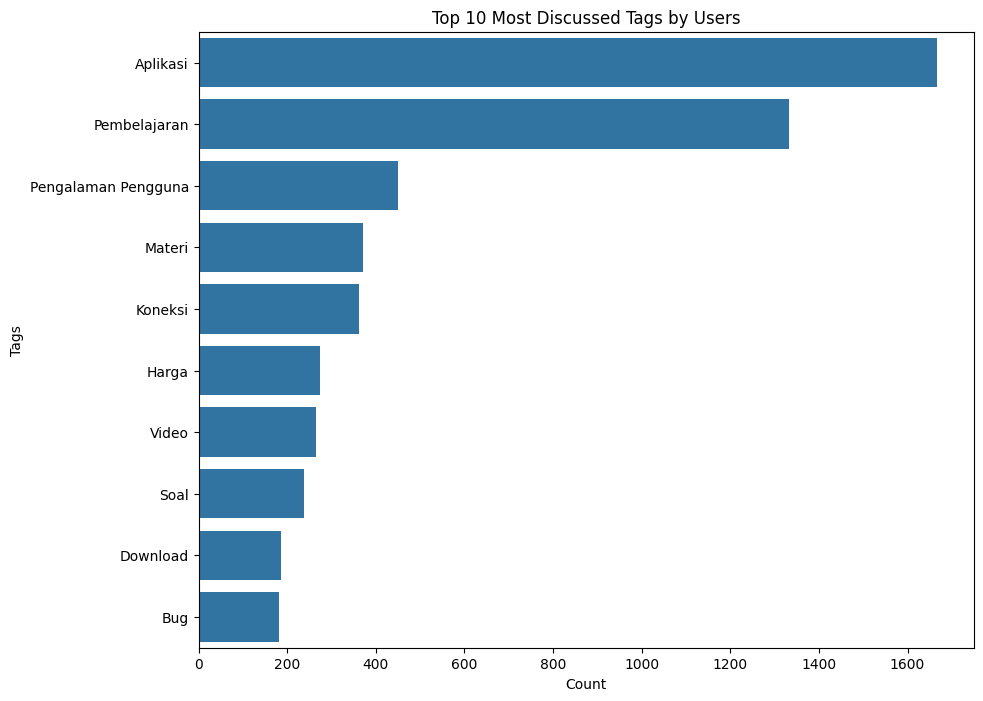

In [ ]:
# Remove empty tags
df_tags = df_tags[df_tags['tags_list'].str.strip().ne('')]

# Calculate the frequency of each tag
tag_counts = df_tags['tags_list'].value_counts().reset_index()
tag_counts.columns = ['tags_list', 'count']

# Get the top 10 tags
top_10_tags = tag_counts.head(10)

# Plot a horizontal barplot for the top 10 tags
plt.figure(figsize=(10, 8))
sns.barplot(data=top_10_tags, y='tags_list', x='count', orient='h')
plt.title('Top 10 Most Discussed Tags by Users')
plt.xlabel('Count')
plt.ylabel('Tags')
plt.show()

###g. How is the distribution of ratings based on the app version?

In [ ]:
# Group by appVersion and calculate the mean score, then sort by score in descending order
version_scores = df_eda.groupby('appVersion')['score'].mean().reset_index().sort_values(by='score', ascending=False)

# Plot the average scores by app version
fig = px.bar(version_scores, x='appVersion', y='score', title='Average Rating Score per App Version')
fig.show()

###h. How is the distribution of ratings based on review time (hours)?

hour
0      40
1      29
2      21
3      24
4      35
5      89
6      84
7     117
8     161
9     190
10    188
11    196
12    191
13    215
14    188
15    223
16    245
17    257
18    373
19    419
20    397
21    267
22    147
23     84
Name: count, dtype: int64


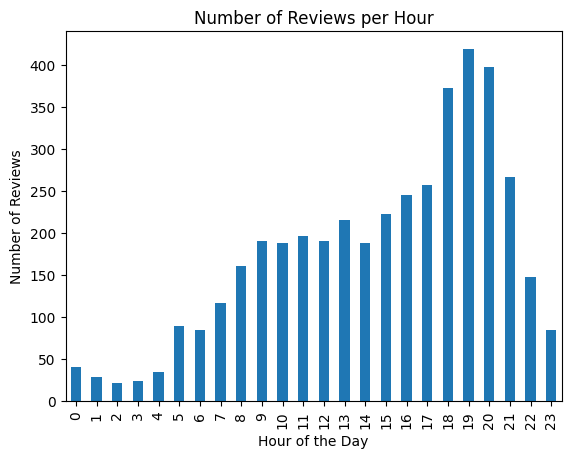

In [ ]:
df_eda['review_time'] = pd.to_datetime(df_eda['review_time'], format='%H:%M:%S', errors='coerce')

df_eda['hour'] = df_eda['review_time'].dt.hour

# Calculate the number of reviews per hour
reviews_per_hour = df_eda['hour'].value_counts().sort_index()

print(reviews_per_hour)

# Visualization (optional)
import matplotlib.pyplot as plt

reviews_per_hour.plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Hour')
plt.show()

In [ ]:
# Extract hour from review_time
df_eda['review_hour'] = pd.to_datetime(df_eda['review_time'], format='%H:%M:%S').dt.hour

# Group by review_hour and calculate the mean score
hourly_scores = df_eda.groupby('review_hour')['score'].mean().reset_index()

# Plot the average scores by review hour
fig = px.line(hourly_scores, x='review_hour', y='score', title='Average Rating Score by Review Hour')
fig.show()

###i. Category - Sentiment

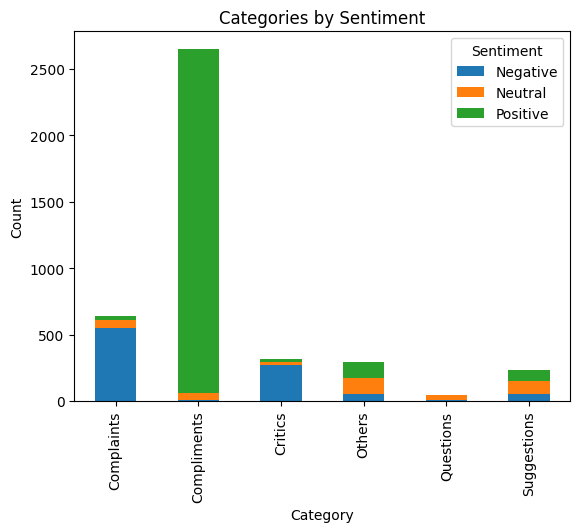

In [ ]:
# Calculate the number of sentiments per category
sentiment_counts = df_eda.groupby(['category', 'sentiment']).size().unstack(fill_value=0)

# Visualization
sentiment_counts.plot(kind='bar', stacked=True)
plt.title('Categories by Sentiment')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

###j. Category - Tags

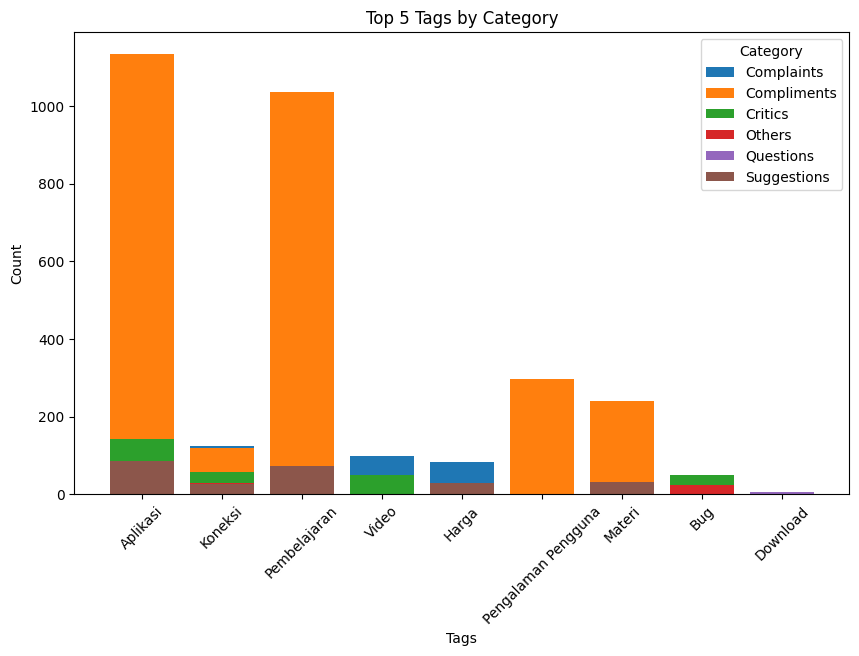

In [ ]:
tag_counts = df_tags.groupby(['category', 'tags_list']).size().reset_index(name='count')

# Get the top 5 tags for each category
top_tags = tag_counts.sort_values(['category', 'count'], ascending=[True, False]).groupby('category').head(5)

# Create the visualization
plt.figure(figsize=(10, 6))
for category in top_tags['category'].unique():
    subset = top_tags[top_tags['category'] == category]
    plt.bar(subset['tags_list'], subset['count'], label=category)

plt.title('Top 5 Tags by Category')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

In [ ]:
for category in top_tags['category'].unique():
    print(f"Category: {category}")
    subset = top_tags[top_tags['category'] == category]
    for index, row in subset.iterrows():
        print(f"  Tag: {row['tags_list']} - Count: {row['count']}")
    print()  # For separating categories

Category: Complaints
  Tag: Aplikasi - Count: 228
  Tag: Koneksi - Count: 125
  Tag: Pembelajaran - Count: 101
  Tag: Video - Count: 98
  Tag: Harga - Count: 83

Category: Compliments
  Tag: Aplikasi - Count: 1134
  Tag: Pembelajaran - Count: 1037
  Tag: Pengalaman Pengguna - Count: 296
  Tag: Materi - Count: 239
  Tag: Koneksi - Count: 120

Category: Critics
  Tag: Aplikasi - Count: 141
  Tag: Pembelajaran - Count: 72
  Tag: Koneksi - Count: 58
  Tag: Bug - Count: 49
  Tag: Video - Count: 49

Category: Others
  Tag: Aplikasi - Count: 55
  Tag: Pembelajaran - Count: 34
  Tag: Koneksi - Count: 29
  Tag: Bug - Count: 23
  Tag: Harga - Count: 19

Category: Questions
  Tag: Aplikasi - Count: 22
  Tag: Pembelajaran - Count: 15
  Tag: Harga - Count: 9
  Tag: Download - Count: 5
  Tag: Koneksi - Count: 4

Category: Suggestions
  Tag: Aplikasi - Count: 86
  Tag: Pembelajaran - Count: 73
  Tag: Materi - Count: 31
  Tag: Harga - Count: 28
  Tag: Koneksi - Count: 27



#8. Download the Final Data

In [ ]:
df_eda.to_csv('preprocessed_data.csv', index=False)
df_exploded.to_csv('preprocessed_tags.csv', index=False)

In [ ]:
from google.colab import files
files.download('preprocessed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('preprocessed_tags.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>